In [1]:
import pylab as p
import pandas as pd
import numpy as np

In [2]:
def lv_evaluate(beta,N,gamma,T,i0=1):
    '''
    SIR model simulation
    '''
    s=[]
    i=[]
    r=[]
    s.append(N-i0)
    i.append(i0)
    r.append(0)

    for t in range(T):
        s.append(s[t]-beta*s[t]*i[t])
        i.append(i[t]+beta*s[t]*i[t]-gamma*i[t])
        r.append(N-s[t+1]-i[t+1])
    return s,i,r

In [3]:
def sir_beta(classe,sim_id,N):
    '''
    #plot sir data simulation
    '''
    c       = result[result.scenario==f[sim_id]]['z'][result.classe==classe].mean()
    rho     = [0.18,0.04,0.04]
    cl      = {'h':0,'m':1,'l':2}
    q       = result[result.scenario==f[sim_id]]['z'][result.classe==classe].sum()/result[result.scenario==f[sim_id]]['z'].sum()
    beta    = rho[cl[classe]] *q* c/N
    return beta

In [4]:
def plot_sir(classe,sim_id,T,N,gamma,i0):
    '''
    #plot sir data simulation
    '''
    beta      = sir_beta(classe=classe,sim_id=sim_id,N=N)
    r0      = (N-1)*beta/gamma
    ss,ii,rr = lv_evaluate(beta=beta,N=N,gamma=gamma,T=T,i0=i0)
    t = range(T+1)

    p.plot(t, ss, 'r-', label='Suscettibili')
    p.plot(t, ii, 'b-', label='Infettati')
    p.plot(t, rr, 'y-', label='Rimossi')
    p.plot(t, max(ii)*np.ones(len(t)), 'b--', label='Imax ('+str(round(max(ii),0))+')')
    p.grid()
    p.legend(loc='best')
    p.xlabel('tempo[gg]')
    p.ylabel('Individui')
    p.suptitle('Evoluzione nei compartimenti ('+tit[sim_id]+')')
    p.title('R0='+str(round(r0,3))+')')
    p.show()
    return max(ii)

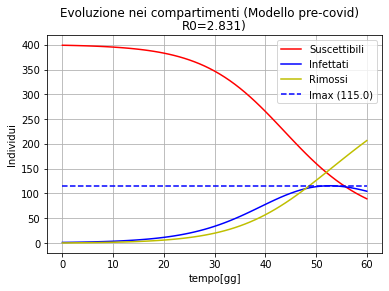

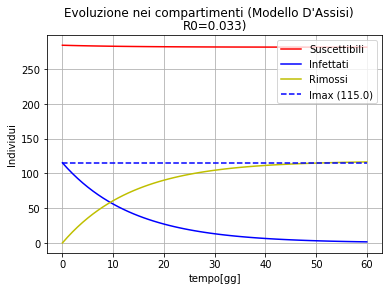

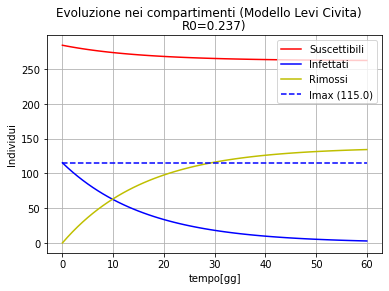

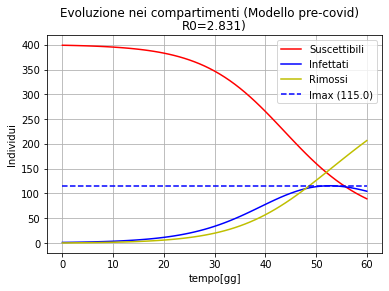

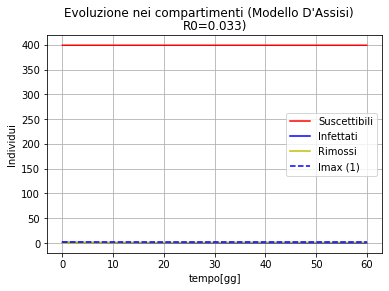

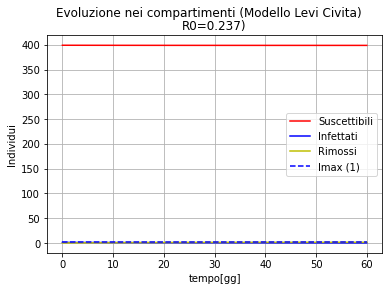

1

In [5]:
result  = pd.read_csv('result_20210528.csv',sep=';')
f       = result.scenario.unique()
tit     = ['Modello pre-covid', "Modello D'Assisi",'Modello Levi Civita']

T       = 60
N       = 400
gamma   = 1/14
i0=1
i0=plot_sir(classe='h',sim_id=0,T=T,N=N,gamma=gamma,i0=i0)
plot_sir(classe='h',sim_id=1,T=T,N=N,gamma=gamma,i0=i0)
plot_sir(classe='h',sim_id=2,T=T,N=N,gamma=gamma,i0=i0)


i0=1
plot_sir(classe='h',sim_id=0,T=T,N=N,gamma=gamma,i0=i0)
plot_sir(classe='h',sim_id=1,T=T,N=N,gamma=gamma,i0=i0)
plot_sir(classe='h',sim_id=2,T=T,N=N,gamma=gamma,i0=i0)